In [14]:
import pandas as pd
from ydata_profiling import ProfileReport

In [15]:
df = pd.read_csv('carprice_cleaned.csv')
df.corr()["price"]

/var/folders/yb/w38bgb0s78z_myxhwyh3_by80000gn/T/ipykernel_55704/3477065612.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["price"]


Unnamed: 0         -0.109093
symboling          -0.079978
doornumber          0.031835
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
cylindernumber      0.718305
enginesize          0.869858
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
consumption         0.796305
Name: price, dtype: float64

In [16]:
profile = ProfileReport(df, title = "Profiling report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
import numpy as np
from sklearn.model_selection import learning_curve
%matplotlib inline
import matplotlib.pyplot as plt
from data_modeling import X_train, y_train, X, y
import pickle 

with open('models/model_sgd.pkl', 'rb') as file: # <------- Modifier le nom du fichier pour tester les autres modeles
    model = pickle.load(file)


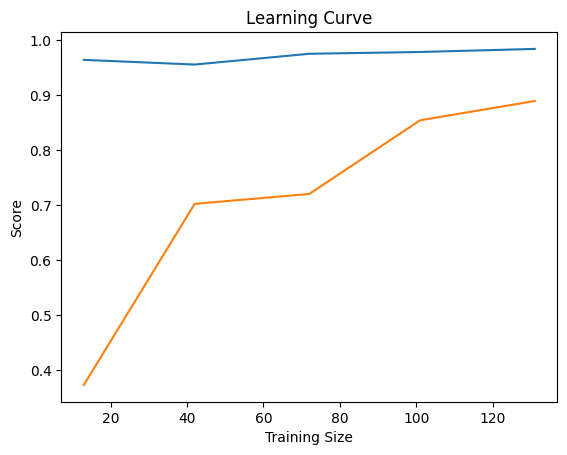

In [44]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")

In [53]:
from sklearn.metrics import *
from math import sqrt

y_pred = model.predict(X)

print(f"MAE : {mean_absolute_error(y, y_pred)}")
print(f"MSE : {sqrt(mean_squared_error(y, y_pred))}")
print(f"R2  : {model.score(X,y)}")

MAE : 1441.8936433127135
MSE : 2021.7716748483044
R2  : 0.93563954259624
